In [1]:
from google.colab import files
uploaded = files.upload()



Saving netflix_titles.csv to netflix_titles.csv


In [2]:
import pandas as pd


df = pd.read_csv("netflix_titles.csv")


df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:

df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [6]:

df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df['director'] = df['director'].fillna('Not Available')
df['cast'] = df['cast'].fillna('Not Available')

# Remove extra whitespace from date column
df['date_added'] = df['date_added'].str.strip()


df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')


df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df[['date_added', 'year_added', 'month_added']].head()



,date_added,year_added,month_added
0,2021-09-25,2021.0,9.0
1,2021-09-24,2021.0,9.0
2,2021-09-24,2021.0,9.0
3,2021-09-24,2021.0,9.0
4,2021-09-24,2021.0,9.0


In [8]:

df.to_csv('netflix_cleaned.csv', index=False)


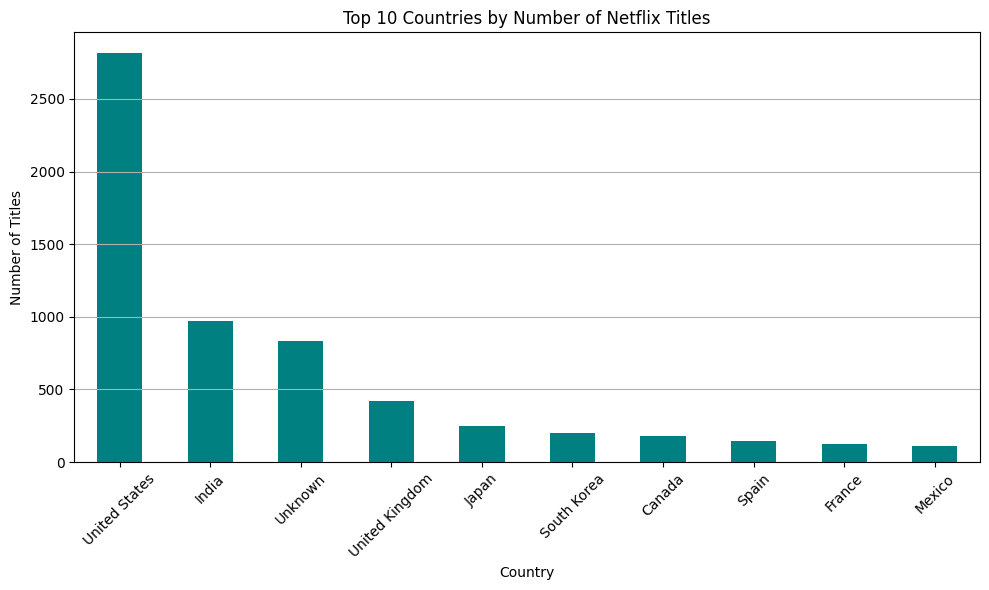

In [9]:
#Q1: Which country has the most Netflix content?

import matplotlib.pyplot as plt


country_counts = df['country'].value_counts().head(10)


plt.figure(figsize=(10,6))
country_counts.plot(kind='bar', color='teal')
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


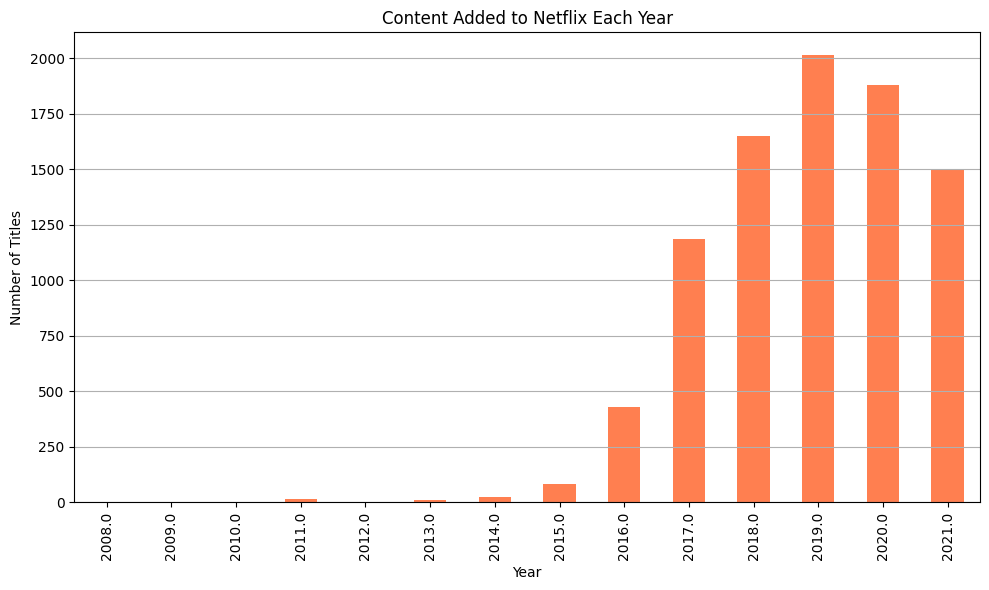

In [10]:
# Q2: How has Netflix content grown over the years?
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


df['year_added'] = df['date_added'].dt.year


yearly_data = df.dropna(subset=['year_added'])


year_counts = yearly_data['year_added'].value_counts().sort_index()


plt.figure(figsize=(10,6))
year_counts.plot(kind='bar', color='coral')
plt.title('Content Added to Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

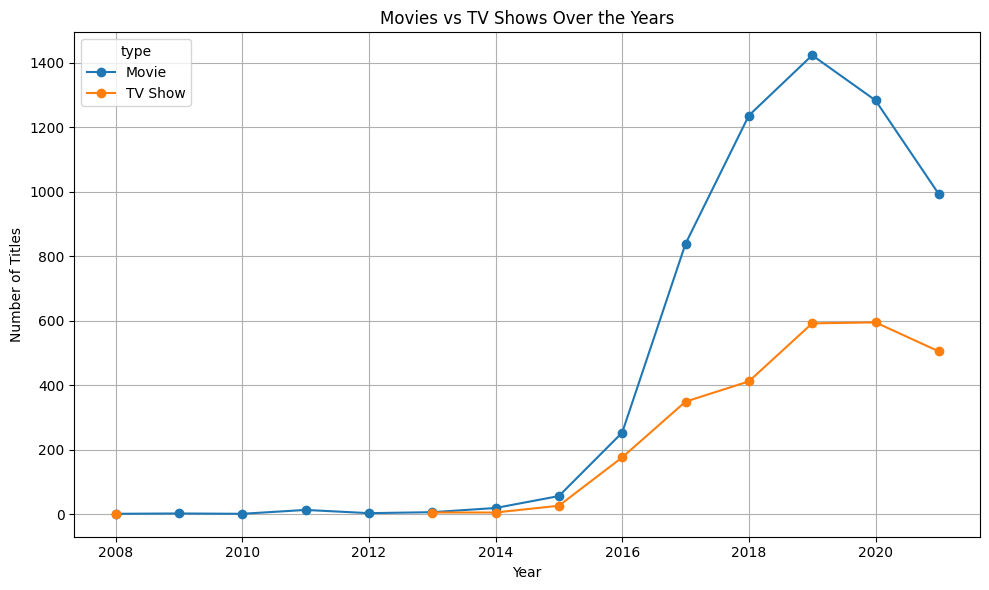

In [11]:
#Q3: Content Type Trend Over the Years (Movies vs TV Shows)

type_trend = df.groupby(['year_added', 'type']).size().unstack()


plt.figure(figsize=(10,6))
type_trend.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Movies vs TV Shows Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()

